## Jupyter-Notebook Steinschlagrisiko von Luca Mazzotta, Marvin von Rappard, Philip Tanner, Yannic Lais

In [1]:
#pip install fitter

In [2]:
import pandas as pd
import numpy as np
import scipy
import scipy.stats
import matplotlib.pyplot as plt
from fitter import Fitter, get_common_distributions, get_distributions

In [3]:
#Daten einlesen
ablöseZone1 = pd.read_csv("../data/out_1_getrennt.csv", sep=";")
ablöseZone2 = pd.read_csv("../data/out_2_getrennt.csv", sep=";")

In [4]:
#Datum und Uhrzeit richtig formatieren und in eine Spalte
ablöseZone1["Datum/Zeit"] = pd.to_datetime(ablöseZone1["Datum"] + " " + ablöseZone1["Uhrzeit"], format='%d.%m.%Y %H:%M')
ablöseZone2["Datum/Zeit"] = pd.to_datetime(ablöseZone2["Date"]  + " " + ablöseZone2["Uhrzeit"], format='%d.%m.%Y %H:%M')
#Alte Datum und Uhrzeit Spalten löschen
ablöseZone1 = ablöseZone1.drop(["Datum", "Uhrzeit"], axis = 1)
ablöseZone2 = ablöseZone2.drop(["Date", "Uhrzeit"], axis = 1)
#Nach Datum sortieren, um nacher die Zeitunterschiede besser berechnen zu können
ablöseZone1.sort_values(by=["Datum/Zeit"])
ablöseZone2.sort_values(by=["Datum/Zeit"])

,m [kg],v [m/s],Datum/Zeit
0,38,45.4,2019-01-01 09:00:00
1,187,41.6,2019-01-03 06:00:00
2,36,44.6,2019-01-04 10:00:00
3,6,41.2,2019-01-07 14:00:00
4,65,39.6,2019-01-11 06:00:00
5,58,33.2,2019-01-11 16:00:00
6,365,40.2,2019-01-14 11:00:00
7,22,46.5,2019-01-16 02:00:00
8,146,36.2,2019-01-18 06:00:00
9,29,38.3,2019-01-19 17:00:00


In [5]:
#Die Zeit zwischen den Steinschlägen berechnen
#Ablösezone1
unterschiedeZone1 = []
for i in range(len(ablöseZone1)-1):
    unterschied = int(abs(ablöseZone1["Datum/Zeit"][i] - ablöseZone1["Datum/Zeit"][i+1]).total_seconds() / 3600)
    unterschiedeZone1.append(unterschied)
#Aus Array ein pandas-df machen damit man es plotten kann
dfunterschiedeZone1 = pd.DataFrame(unterschiedeZone1, columns=['Unterschiede'])

#Ablösezone2
unterschiedeZone2 = []
for i in range(len(ablöseZone2)-1):
    unterschied = int(abs(ablöseZone2["Datum/Zeit"][i] - ablöseZone2["Datum/Zeit"][i+1]).total_seconds() / 3600)
    unterschiedeZone2.append(unterschied)
#Aus Array ein df machen damit man es plotten kann
dfunterschiedeZone2 = pd.DataFrame(unterschiedeZone2, columns=['Unterschiede'])


Für die Monte-Carlo Simulation benötigt es die Verteilungen mit den dazugehörigen Parameter. Um ein Überblick über die Daten zu erhalten wurden diese jeweils mittels Diagrammen Visuell untersucht.

### Histogramme Geschwindigkeit

Text(0.5, 0, 'Gechwindigkeit in m/s')

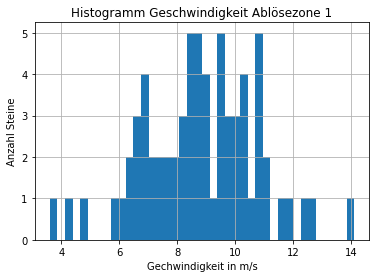

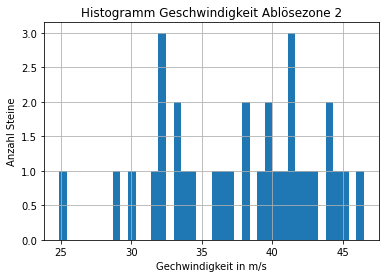

In [6]:
ablöseZone1.hist(column="v [m/s]", bins=40)
plt.title("Histogramm Geschwindigkeit Ablösezone 1")
plt.ylabel("Anzahl Steine")
plt.xlabel("Gechwindigkeit in m/s")

ablöseZone2.hist(column="v [m/s]", bins=40)
plt.title("Histogramm Geschwindigkeit Ablösezone 2")
plt.ylabel("Anzahl Steine")
plt.xlabel("Gechwindigkeit in m/s")

### Histogramme Masse

Text(0.5, 0, 'Masse in kg')

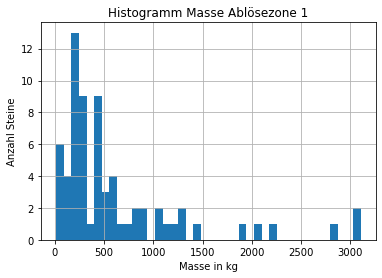

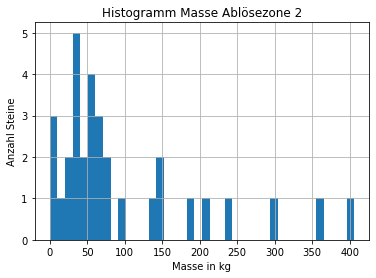

In [7]:
ablöseZone1.hist(column="m [kg]", bins=40)
plt.title("Histogramm Masse Ablösezone 1")
plt.ylabel("Anzahl Steine")
plt.xlabel("Masse in kg")

ablöseZone2.hist(column="m [kg]", bins=40)
plt.title("Histogramm Masse Ablösezone 2")
plt.ylabel("Anzahl Steine")
plt.xlabel("Masse in kg")

### Histogramme Zeitabstände

Text(0.5, 0, 'Zeit in Stunden')

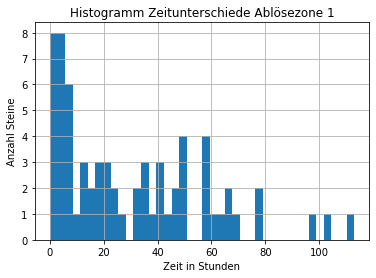

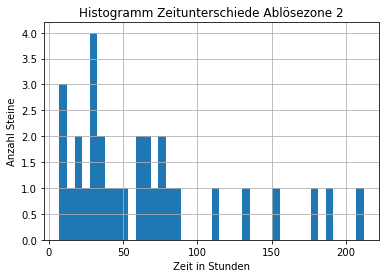

In [8]:
dfunterschiedeZone1.hist(column="Unterschiede", bins=40)
plt.title("Histogramm Zeitunterschiede Ablösezone 1")
plt.ylabel("Anzahl Steine")
plt.xlabel("Zeit in Stunden")

dfunterschiedeZone2.hist(column="Unterschiede", bins=40)
plt.title("Histogramm Zeitunterschiede Ablösezone 2")
plt.ylabel("Anzahl Steine")
plt.xlabel("Zeit in Stunden")

# Fitting

Anhand der Histogramme und Verteilungsfunktionen kann man herausfinden welche Verteilung am besten passt, diese Verteilung und die jeweiligen Parameter benötigt man um die Zufallsvariabeln zu bestimmen, welche für die Monte-Carlo Simulation benötigt werden.
Dieses Vorgehen haben wir mit der Scipy-Libary programmiert. Als erstes wurden die Histogramme mittels dem Befehl "get_common_distributions()" gefitted. Mit dem Befehl "get_best" wurde die Verteilung, welche die geringste Summe, von erstellten Quadraten zwischen Messpunkt und Verteilung besass, ausgegeben. Das heisst, dass die Funktion mit der kleinsten Summe als beste angesehen wurde. Diese Methode ist allerdings nicht immer korrekt. Deshalb wurden nach dieser "get_best" Funktion die besten drei Verteilungen ausgegeben und diese noch über die Verteilungsfunktionen geplottet, so konnte visuell noch unterschieden werden, welche von den 3 Verteilungen am besten zu der Verteilungsfunktion passt.

In [9]:
#Liste der common_distributions:
get_common_distributions()

['cauchy',
 'chi2',
 'expon',
 'exponpow',
 'gamma',
 'lognorm',
 'norm',
 'powerlaw',
 'rayleigh',
 'uniform']

### Zone 1, Geschwindigkeit

#### Über Histogramme gefittet

{'norm': {'loc': 8.788235294117646, 'scale': 1.9745088303442118}}

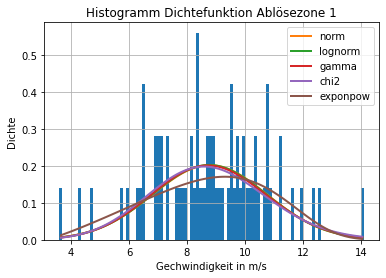

In [10]:
ablöseZone1FittedV = Fitter(ablöseZone1["v [m/s]"], distributions=get_common_distributions())
ablöseZone1FittedV.fit()
ablöseZone1FittedV.summary()
plt.title("Histogramm Dichtefunktion Ablösezone 1")
plt.ylabel("Dichte")
plt.xlabel("Gechwindigkeit in m/s")
ablöseZone1FittedV.get_best(method = 'sumsquare_error')

#### Parameter für Top 3 Verteilungen bestimmen

In [11]:
zone1NormalVerteilungV = ablöseZone1FittedV.fitted_param["norm"]
zone1LognormVerteilungV = ablöseZone1FittedV.fitted_param["lognorm"]
zone1GammaVerteilungV = ablöseZone1FittedV.fitted_param["gamma"]

print(zone1NormalVerteilungV)
print(zone1LognormVerteilungV)
print(zone1GammaVerteilungV)

(8.788235294117646, 1.9745088303442118)
(0.0076789319250212, -247.89516201765224, 256.6759418651161)
(808.5274464534752, -47.62228137964149, 0.06977057532531764)


#### Top 3 Verteilungen über Verteilungsfunktion plotten

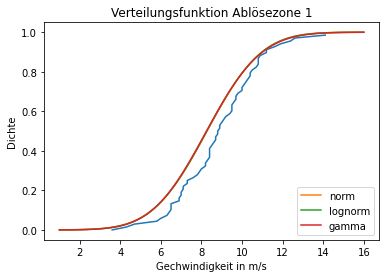

In [12]:
plt.plot(np.sort(ablöseZone1["v [m/s]"]), np.linspace(0, 1, len(ablöseZone1["v [m/s]"]), endpoint=False))
plt.title("Verteilungsfunktion Ablösezone 1")
plt.ylabel("Dichte")
plt.xlabel("Gechwindigkeit in m/s")

Norm = plt.plot(np.linspace(1,16,100), scipy.stats.norm.cdf(loc = zone1NormalVerteilungV[0], scale = zone1NormalVerteilungV[1], x = np.linspace(2,16,100)), label="norm")
Lognorm = plt.plot(np.linspace(1,16,100), scipy.stats.lognorm.cdf(s = zone1LognormVerteilungV[0], loc = zone1LognormVerteilungV[1], scale = zone1LognormVerteilungV[2], x = np.linspace(2,16,100)), label="lognorm")
Gamma = plt.plot(np.linspace(1,16,100), scipy.stats.gamma.cdf(a = zone1GammaVerteilungV[0], loc = zone1GammaVerteilungV[1], scale = zone1GammaVerteilungV[2], x = np.linspace(2,16,100)),label="gamma")
plt.legend(loc='lower right')

#### Wir haben uns für "norm" entschieden

####  Zufallsvariable bestimmen

In [13]:
def calcRandomZone1V(num: int):
    return scipy.stats.norm.rvs(loc = zone1NormalVerteilungV[0], scale = zone1NormalVerteilungV[1], size = num)

### Zone 2, Geschwindigkeit

#### Über Histogramme gefittet

{'powerlaw': {'a': 1.6225211698026003,
  'loc': 24.037051269746893,
  'scale': 22.46294873394062}}

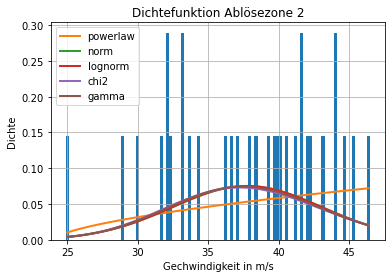

In [14]:
ablöseZone2FittedV = Fitter(ablöseZone2["v [m/s]"], distributions=get_common_distributions())
ablöseZone2FittedV.fit()
ablöseZone2FittedV.summary()
plt.title("Dichtefunktion Ablösezone 2")
plt.ylabel("Dichte")
plt.xlabel("Gechwindigkeit in m/s")
ablöseZone2FittedV.get_best(method = 'sumsquare_error')

#### Parameter für Top 3 Verteilungen bestimmen

In [15]:
zone2PowerlawVerteilungV = ablöseZone2FittedV.fitted_param["powerlaw"]
zone2NormalVerteilungV = ablöseZone2FittedV.fitted_param["norm"]
zone2LognormVerteilungV = ablöseZone2FittedV.fitted_param["lognorm"]

print(zone2PowerlawVerteilungV)
print(zone2NormalVerteilungV)
print(zone2LognormVerteilungV)

(1.6225211698026003, 24.037051269746893, 22.46294873394062)
(37.790625, 5.31080027956004)
(0.006164831706586592, -822.1618461572732, 859.9351997321913)


#### Top 3 Verteilungen über Verteilungsfunktion plotten

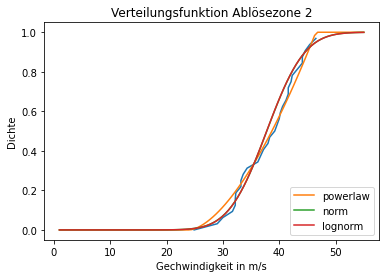

In [16]:
plt.plot(np.sort(ablöseZone2["v [m/s]"]), np.linspace(0, 1, len(ablöseZone2["v [m/s]"]), endpoint=False))
plt.plot(np.linspace(1,55,100), scipy.stats.powerlaw.cdf(a = zone2PowerlawVerteilungV[0], loc = zone2PowerlawVerteilungV[1], scale = zone2PowerlawVerteilungV[2], x = np.linspace(1,55,100)),label="powerlaw")
plt.plot(np.linspace(1,55,100), scipy.stats.norm.cdf(loc = zone2NormalVerteilungV[0], scale = zone2NormalVerteilungV[1], x = np.linspace(1,55,100)),label="norm")
plt.plot(np.linspace(1,55,100), scipy.stats.lognorm.cdf(s = zone2LognormVerteilungV[0], loc = zone2LognormVerteilungV[1], scale = zone2LognormVerteilungV[2], x = np.linspace(1,55,100)),label="lognorm")
plt.title("Verteilungsfunktion Ablösezone 2")
plt.ylabel("Dichte")
plt.xlabel("Gechwindigkeit in m/s")
plt.legend(loc='lower right')

#### Wir haben uns für "norm" entschieden

####  Zufallsvariable bestimmen

In [17]:
def calcRandomZone2V(num: int):
    return scipy.stats.norm.rvs(loc = zone2NormalVerteilungV[0], scale = zone2NormalVerteilungV[1], size = num)

### Zone 1, Masse

#### Über Histogramme gefittet

{'cauchy': {'loc': 313.1732540199847, 'scale': 188.98367020559948}}

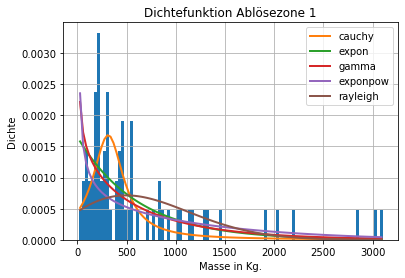

In [18]:
ablöseZone1FittedM = Fitter(ablöseZone1["m [kg]"], distributions=get_common_distributions())
ablöseZone1FittedM.fit()
ablöseZone1FittedM.summary()
plt.title("Dichtefunktion Ablösezone 1")
plt.ylabel("Dichte")
plt.xlabel("Masse in Kg.")
ablöseZone1FittedM.get_best(method = 'sumsquare_error')

#### Parameter für Top 3 Verteilungen bestimmen

In [19]:
zone1CauchyVerteilungM = ablöseZone1FittedM.fitted_param["cauchy"]
zone1ExponVerteilungM = ablöseZone1FittedM.fitted_param["expon"]
zone1GammaVerteilungM = ablöseZone1FittedM.fitted_param["gamma"]

print(zone1CauchyVerteilungM)
print(zone1ExponVerteilungM)
print(zone1GammaVerteilungM)

(313.1732540199847, 188.98367020559948)
(12.0, 616.6323529411765)
(0.8079614675149851, 11.999999999999998, 822.0119854583972)


#### Top 3 Verteilungen über Verteilungsfunktion plotten

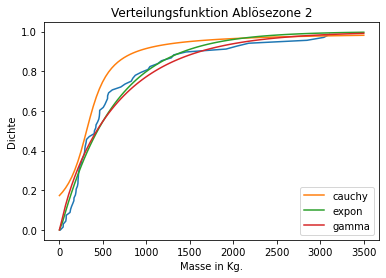

In [20]:
plt.plot(np.sort(ablöseZone1["m [kg]"]), np.linspace(0, 1, len(ablöseZone1["m [kg]"]), endpoint=False))
plt.plot(np.linspace(1,3500,100), scipy.stats.cauchy.cdf(loc = zone1CauchyVerteilungM[0], scale = zone1CauchyVerteilungM[1], x = np.linspace(1,3500,100)),label="cauchy")
plt.plot(np.linspace(1,3500,100), scipy.stats.expon.cdf(loc = zone1ExponVerteilungM[0], scale = zone1ExponVerteilungM[1], x = np.linspace(1,3500,100)),label="expon")
plt.plot(np.linspace(1,3500,100), scipy.stats.gamma.cdf(a = zone1GammaVerteilungM[0], loc = zone1GammaVerteilungM[1], scale = zone1GammaVerteilungM[2], x = np.linspace(1,3500,100)),label="gamma")
plt.title("Verteilungsfunktion Ablösezone 2")
plt.ylabel("Dichte")
plt.xlabel("Masse in Kg.")
plt.legend()

#### Wir haben uns für "expon" entschieden

####  Zufallsvariable bestimmen

In [21]:
def calcRandomZone1M(num: int):
    return scipy.stats.expon.rvs(loc = zone1ExponVerteilungM[0], scale = zone1ExponVerteilungM[1], size = num)

### Zone 2, Masse

#### Über Histogramme gefittet

{'cauchy': {'loc': 51.02159521968939, 'scale': 27.34050279860369}}

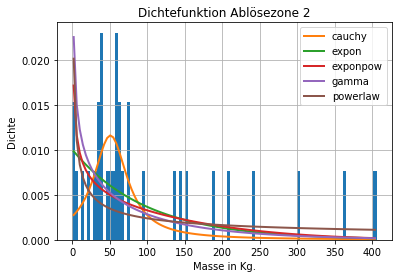

In [22]:
ablöseZone2FittedM = Fitter(ablöseZone2["m [kg]"], distributions=get_common_distributions())
ablöseZone2FittedM.fit()
ablöseZone2FittedM.summary()
plt.title("Dichtefunktion Ablösezone 2")
plt.ylabel("Dichte")
plt.xlabel("Masse in Kg.")
ablöseZone2FittedM.get_best(method = 'sumsquare_error')

#### Parameter für Top 3 Verteilungen bestimmen

In [23]:
zone2CauchyVerteilungM = ablöseZone2FittedM.fitted_param["cauchy"]
zone2ExponVerteilungM = ablöseZone2FittedM.fitted_param["expon"]
zone2ExponpowVerteilungM = ablöseZone2FittedM.fitted_param["exponpow"]

print(zone2CauchyVerteilungM)
print(zone2ExponVerteilungM)
print(zone2ExponpowVerteilungM)

(51.02159521968939, 27.34050279860369)
(0.0, 99.25)
(0.6497663723859814, -1.6838035666773794e-26, 182.1745284038883)


#### Top 3 Verteilungen über Verteilungsfunktion plotten

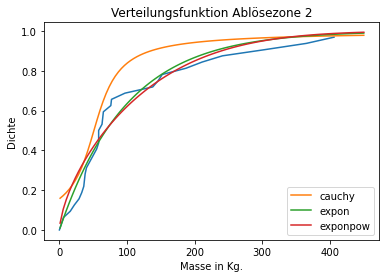

In [24]:
plt.plot(np.sort(ablöseZone2["m [kg]"]), np.linspace(0, 1, len(ablöseZone2["m [kg]"]), endpoint=False))
plt.plot(np.linspace(1,450,100), scipy.stats.cauchy.cdf(loc = zone2CauchyVerteilungM[0], scale = zone2CauchyVerteilungM[1], x = np.linspace(1,450,100)),label="cauchy")
plt.plot(np.linspace(1,450,100), scipy.stats.expon.cdf(loc = zone2ExponVerteilungM[0], scale = zone2ExponVerteilungM[1], x = np.linspace(1,450,100)),label="expon")
plt.plot(np.linspace(1,450,100), scipy.stats.exponpow.cdf(b = zone2ExponpowVerteilungM[0], loc = zone2ExponpowVerteilungM[1], scale = zone2ExponpowVerteilungM[2], x = np.linspace(1,450,100)),label="exponpow")
plt.title("Verteilungsfunktion Ablösezone 2")
plt.ylabel("Dichte")
plt.xlabel("Masse in Kg.")
plt.legend()

#### Wir haben uns für "expon" entschieden

####  Zufallsvariable bestimmen

In [25]:
def calcRandomZone2M(num: int):
    return scipy.stats.expon.rvs(loc = zone2ExponVerteilungM[0], scale = zone2ExponVerteilungM[1], size = num)

### Zone 1, Unterschiede

#### Über Histogramme gefittet

{'gamma': {'a': 0.7720943018929209,
  'loc': -2.1070777126863917e-25,
  'scale': 32.180388904581854}}

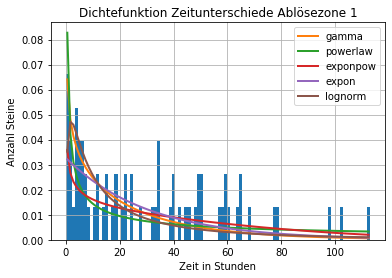

In [26]:
ablöseZone1FittedU = Fitter(dfunterschiedeZone1["Unterschiede"], distributions=get_common_distributions())
ablöseZone1FittedU.fit()
ablöseZone1FittedU.summary()
plt.title("Dichtefunktion Zeitunterschiede Ablösezone 1")
plt.ylabel("Anzahl Steine")
plt.xlabel("Zeit in Stunden")
ablöseZone1FittedU.get_best(method = 'sumsquare_error')

#### Parameter für Top 3 Verteilungen bestimmen

In [27]:
zone1GammaVerteilungU = ablöseZone1FittedU.fitted_param["gamma"]
zone1PowerlawVerteilungU = ablöseZone1FittedU.fitted_param["powerlaw"]
zone1ExponpowVerteilungU = ablöseZone1FittedU.fitted_param["exponpow"]
zone1ExponVerteilungU = ablöseZone1FittedU.fitted_param["expon"]

print(zone1GammaVerteilungU)
print(zone1PowerlawVerteilungU)
print(zone1ExponpowVerteilungU)
print(zone1ExponVerteilungU)

(0.7720943018929209, -2.1070777126863917e-25, 32.180388904581854)
(0.3924871862674937, -3.0192940445763056e-26, 127.86206239315683)
(0.7320422899388943, -1.3229516070008987e-27, 75.92812935594412)
(0.0, 30.55223880597015)


#### Top 3 Verteilungen über Verteilungsfunktion plotten

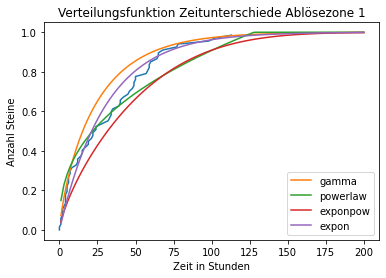

In [28]:
plt.plot(np.sort(dfunterschiedeZone1["Unterschiede"]), np.linspace(0, 1, len(dfunterschiedeZone1["Unterschiede"]), endpoint=False))
plt.plot(np.linspace(1,200,100), scipy.stats.gamma.cdf(a = zone1GammaVerteilungU[0], loc = zone1GammaVerteilungU[1], scale = zone1GammaVerteilungU[2], x = np.linspace(1,200,100)),label="gamma")
plt.plot(np.linspace(1,200,100), scipy.stats.powerlaw.cdf(a = zone1PowerlawVerteilungU[0], loc =  zone1PowerlawVerteilungU[1], scale = zone1PowerlawVerteilungU[2], x = np.linspace(1,200,100)),label="powerlaw")
plt.plot(np.linspace(1,200,100), scipy.stats.exponpow.cdf(b = zone1ExponpowVerteilungU[0], loc = zone1ExponpowVerteilungU[1], scale = zone1ExponpowVerteilungU[2], x = np.linspace(1,200,100)),label="exponpow")
plt.plot(np.linspace(1,200,100), scipy.stats.expon.cdf(loc = zone1ExponVerteilungU[0], scale = zone1ExponVerteilungU[1], x = np.linspace(1,200,100)),label="expon")
plt.title("Verteilungsfunktion Zeitunterschiede Ablösezone 1")
plt.ylabel("Anzahl Steine")
plt.xlabel("Zeit in Stunden")
plt.legend()


#### Wir haben uns für "expon" entschieden

####  Zufallsvariable bestimmen

In [29]:
def calcRandomZone1U(num: int):
    return scipy.stats.expon.rvs(loc = zone1ExponVerteilungU[0], scale = zone1ExponVerteilungU[1], size = num)

### Zone 2, Unterschiede

#### Über Histogramme gefittet

{'exponpow': {'b': 0.6971027826831848,
  'loc': 6.999999999999999,
  'scale': 117.24076793057438}}

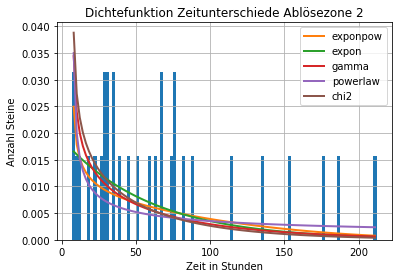

In [30]:
ablöseZone2FittedU = Fitter(dfunterschiedeZone2["Unterschiede"], distributions=get_common_distributions())
ablöseZone2FittedU.fit()
ablöseZone2FittedU.summary()
plt.title("Dichtefunktion Zeitunterschiede Ablösezone 2")
plt.ylabel("Anzahl Steine")
plt.xlabel("Zeit in Stunden")
ablöseZone2FittedU.get_best(method = 'sumsquare_error')

#### Parameter für Top 3 Verteilungen bestimmen

In [31]:
zone2GammaVerteilungU = ablöseZone2FittedU.fitted_param["exponpow"]
zone2PowerlawVerteilungU = ablöseZone2FittedU.fitted_param["expon"]
zone2ExponpowVerteilungU = ablöseZone2FittedU.fitted_param["gamma"]

print(zone2GammaVerteilungU)
print(zone2PowerlawVerteilungU)
print(zone2ExponpowVerteilungU)

(0.6971027826831848, 6.999999999999999, 117.24076793057438)
(7.0, 59.322580645161295)
(0.6924339239082432, 6.999999999999999, 85.33142881264439)


#### Top 3 Verteilungen über Verteilungsfunktion plotten

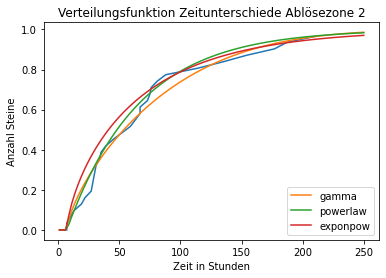

In [32]:
plt.plot(np.sort(dfunterschiedeZone2["Unterschiede"]), np.linspace(0, 1, len(dfunterschiedeZone2["Unterschiede"]), endpoint=False))
plt.plot(np.linspace(1,250,100), scipy.stats.exponpow.cdf(b = zone2GammaVerteilungU[0], loc = zone2GammaVerteilungU[1], scale = zone2GammaVerteilungU[2], x = np.linspace(1,250,100)),label="gamma")
plt.plot(np.linspace(1,250,100), scipy.stats.expon.cdf(loc = zone2PowerlawVerteilungU[0], scale = zone2PowerlawVerteilungU[1], x = np.linspace(1,250,100)),label="powerlaw")
plt.plot(np.linspace(1,250,100), scipy.stats.gamma.cdf(a = zone2ExponpowVerteilungU[0], loc = zone2ExponpowVerteilungU[1], scale = zone2ExponpowVerteilungU[2], x = np.linspace(1,250,100)),label="exponpow")
plt.title("Verteilungsfunktion Zeitunterschiede Ablösezone 2")
plt.ylabel("Anzahl Steine")
plt.xlabel("Zeit in Stunden")
plt.legend(loc='lower right')

#### Wir haben uns für "exponpow" entschieden

####  Zufallsvariable bestimmen

In [33]:
def calcRandomZone2U(num: int):
    return scipy.stats.exponpow.rvs(b = zone2GammaVerteilungU[0], loc = zone2GammaVerteilungU[1], scale = zone2GammaVerteilungU[2], size = num)

# Monte-Carlo Simulation

In [34]:
#Monte Carlo Simulation
def monteCarlo(simulationslängeJahre: int) -> (int, int, list): 
    simulationslänge = simulationslängeJahre * 24 * 365
    
    plan = []
    netzReisser = 0
    zeitReisser = []
    steineImNetz = 0
    stunde = 0
    steine = 0
    i = 0
    laengeliste = simulationslängeJahre * 400

    randomUList1 = calcRandomZone1U(laengeliste)
    randomMList1 = calcRandomZone1M(laengeliste)
    randomVList1 = calcRandomZone1V(laengeliste)

    randomUList2 = calcRandomZone2U(laengeliste)
    randomMList2 = calcRandomZone2M(laengeliste)
    randomVList2 = calcRandomZone2V(laengeliste)

    for j in range(laengeliste-1):
        randomUList1[j+1] = randomUList1[j] + randomUList1[j+1]
        plan.append([randomUList1[j],randomMList1[j],randomVList1[j]])
        randomUList2[j+1] = randomUList2[j] + randomUList2[j+1]
        plan.append([randomUList2[j],randomMList2[j],randomVList2[j]])

    plan.sort()

    while simulationslänge > 0:
        i += 1

        zeitUnterschied = plan[i][0] - plan[i-1][0]
        simulationslänge -= zeitUnterschied
        stunde += zeitUnterschied

        randomM = plan[i][1]
        randomV = plan[i][2]

        potentielleEnergie = (0.5 * randomM * (randomV**2)) / 1000
        steine += 1

        #Netz reisst sicher
        if potentielleEnergie > 1000 \
            or zeitUnterschied < 24 and steineImNetz > 2000 and potentielleEnergie > 500:
            netzReisser += 1
            zeitReisser.append(stunde)
            steineImNetz = 0
        #Netz reisst nicht, Netz ist geräumt
        elif zeitUnterschied > 24 and potentielleEnergie < 1000:
            steineImNetz = randomM
        #Netz reisst nicht --> 
        # im Netz sind > 2000 kg --> poteng < 500kJ:
        # Netz sind < 2000 kg --> poteng < 1000kJ:
        elif zeitUnterschied < 24 and steineImNetz > 2000 and potentielleEnergie < 500 \
            or zeitUnterschied < 24 and steineImNetz < 2000 and potentielleEnergie < 1000:
            steineImNetz += randomM
    
    return (steine, netzReisser, zeitReisser)

In [35]:
jahre = 100_000
resultat = monteCarlo(jahre)
print("Anzahl Steinschläge:", resultat[0])
print("Anzahl Netzreisser:", resultat[1])
print("Zeitpunkte wann das Netz gerissen ist (In Stunden):", resultat[2])

Anzahl Steinschläge: 40947208
Anzahl Netzreisser: 4979
Zeitpunkte wann das Netz gerissen ist (In Stunden): [162614.8032574636, 532886.0406204292, 612331.5434315684, 727806.6666419978, 746127.9162747288, 845962.648827537, 1018773.9011681997, 1424146.9784372938, 1507566.658436621, 1547638.4936977634, 1627703.8594344447, 1882420.0964985897, 2181399.1142273126, 2539281.1162128947, 2685229.6449975455, 2877562.574906482, 2932766.7759347167, 2934127.935242847, 2972702.0253297472, 3014602.320344167, 3283610.9512736322, 3431083.101800439, 3531191.628120367, 3533482.9232197716, 3744052.239254981, 4116071.321715093, 4463466.699316392, 4508547.270889737, 4567914.984624671, 4813366.03269307, 5057950.093791804, 5078223.717477333, 5083551.35995646, 5085511.190401583, 5141646.952467823, 5357142.836883957, 5366157.264945623, 5390741.991467479, 5668463.977698683, 5672861.897474096, 5814403.202077485, 5946270.456432491, 5968774.437506693, 5984194.980773614, 6269768.212551252, 6344893.538002302, 6346037.9

Text(0, 0.5, 'Netzreisser')

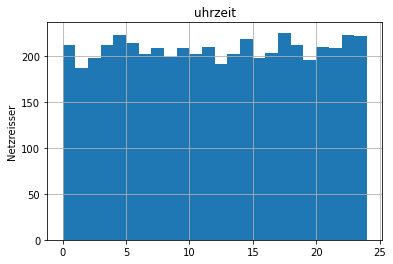

In [36]:
#Kontrollieren ob die Netzreisser eine Abhängigkeit haben mit der Uhrzeit haben
uhrzeiten = []
for i in range(len(resultat[2])):
    uhrzeiten.append(resultat[2][i]%24)
    
dfUhrzeiten = pd.DataFrame(uhrzeiten, columns=['uhrzeit'])
dfUhrzeiten.hist(column="uhrzeit", bins=24)
plt.ylabel('Netzreisser')

Wie man anhand der Hisogramme erkennen kann, besteht kein Zusammenhang zwischen den Netzreissern und der Uhrzeit. Somit kann die Verteilung der Autos auseracht gelassen werden. Deshalb werden die 1200 Auto gleichmässig über den Tag verteilt.

In [37]:
zeitpunkteAuto = []
auto = 0
while auto < 24:
    zeitpunkteAuto.append(auto)
    auto = round(auto + 0.02, 2)

Annahme Strasse:
Strassenlänge 200m:
Anfang = 0m
Ablösezone 1 = 100m
Ablösezone 2 = 100m
Ende = 200m

Annahme: bei einer Frontkollision mit 60 km/h (16.67 m/s) Bsp. gegen ein Stein , stirbt man mit einer Wahrscheinlichkeit von 5% (Siehe Bericht) <br>
Reaktionszeit (Vorbremszeit) = 1sek (Quelle: https://de.wikipedia.org/wiki/Reaktion_(Verkehrsgeschehen)) <br>
<br>
Quelle für Bremszeit und Bremsweg: <br>
https://www.johannes-strommer.com/formeln/weg-geschwindigkeit-beschleunigung-zeit/ <br>
Bremsweg = 1sek * 16.67m/s = 16.67m <br>

Da wir für beide Ablösezonen eine Liste mit dem Zeitpunkt der Netzreisser in Stunden haben, können wir 2 Aussagen tätigen: <br>
- Befindet sich das Auto über Meter 83.33 und unter Meter 100 im Zeitintervall [(ZeitpunktpunktreisserZone1 - 1sek) bis (ZeitpunktreisserZone1)] kann das Auto nicht mehr schnell genug bremsen und somit wird es mit einer Wahrscheinlichkeit von 5% zu einem tödlichen Unfall.
- Befindet sich das Auto genau unter dem Stein (Todeszone = 2m) wird es zu 100% ein Todesfall.

In [38]:
startGefahrenzone = 83.33
geschwindigkeit = 16.67

In [39]:
def toHours(seconds:float) -> float:
    return seconds/60/60

In [40]:
tote = 0
ZeitBisGefahrenzone = toHours(startGefahrenzone/geschwindigkeit)
todesWahrscheinlichkeitMit60 = 0.05
durchschnittlichePersonenImAuto = 1.56
for uhrzeit in uhrzeiten:
    for zeitpunkt in zeitpunkteAuto:
        ZeitStartGefahrenzone = zeitpunkt + ZeitBisGefahrenzone
        if ZeitStartGefahrenzone > uhrzeit - toHours(1) and \
            ZeitStartGefahrenzone < uhrzeit - toHours(0.12): #Auto schafft es nicht zu bremsen
            tote += (1 * todesWahrscheinlichkeitMit60 * durchschnittlichePersonenImAuto)
        elif ZeitStartGefahrenzone >= uhrzeit - toHours(0.12) and \
            ZeitStartGefahrenzone <= uhrzeit: #Stein fällt auf Auto
            tote += 1 * durchschnittlichePersonenImAuto

In [41]:
print("Anzahl Tote:", tote)
print("Wahrscheinlichkeit das jemand stirbt:", tote / jahre)
print("Unsere Wahrscheinlichkeit ist höher als der Grenzwert:",  tote / jahre > 10**-4)

Anzahl Tote: 14.975999999999988
Wahrscheinlichkeit das jemand stirbt: 0.0001497599999999999
Unsere Wahrscheinlichkeit ist höher als der Grenzwert: True


## Fazit

### Da unsere Wahrscheinlichkeit grösser ist als der Grenzwert, muss die Strasse gesperrt werden.